In [130]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')

import utils.stats as stats
import utils.testing_gen as gen
import utils.loading as load
import utils.nn_gen as nn_gen
from utils.tools import array2List

In [131]:
### gen dat

def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 1000


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params

In [133]:
NB_SIM = 1

In [134]:
params1 = getParams()

params2 = getParams()
params2.noisy = 1


data_gt_1  = gen.get_mult_data(params1, NB_SIM)
graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
data_gt_list_1 = array2List(data_gt_1)


data_gt_2 = gen.get_mult_data(params2, NB_SIM)
graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
data_gt_list_2 = array2List(data_gt_2)

v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:11<00:00, 88.61it/s] 


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:11<00:00, 86.17it/s] 


In [171]:
def rdf(sim, boundary = 120, nb_bins = 240, max_dist = 240):
    """ 
    sim [T, N, 2]
    """
    T, N, _ = sim.shape


    r = np.linspace(0.001, max_dist, nb_bins)
    dr = r[1] - r[0]

    g_r = np.zeros_like(r)


    for t in tqdm(range(T)):
        for i in range(N):
            for j in range(i+1, N):

                dist = sim[t, i] - sim[t, j]
                dist = np.linalg.norm(dist, axis = -1)

                if dist < max_dist:
                    index_dist = int(dist / dr)
                    g_r[index_dist] += 2

    #print(g_r)

    rho = N / (2 * boundary) ** 2

    #print(rho)

    g_r = g_r / (2 * np.pi * r * dr * rho * T * N)

    #print((2 * np.pi * r * dr * rho ))

    return g_r, r

# check it
def rdf2(sim, boundary=120, nb_bins=720, max_dist=240):
    """ 
    sim [T, N, 2]
    """
    T, N, _ = sim.shape

    r = np.linspace(0.001, max_dist, nb_bins)
    dr = r[1] - r[0]
    g_r = np.zeros_like(r)

    for t in tqdm(range(T)):
        for i in range(N):
            # Vectorized computation of distances
            dist_vec = sim[t, i] - sim[t, i+1:N]
            dist = np.linalg.norm(dist_vec, axis=-1)

            # Filter distances that are within the max_dist
            valid_distances = dist[dist < max_dist]
            
            # Convert distances to bin indices
            indices = (valid_distances / dr).astype(int)
            
            # Increment g_r based on indices
            np.add.at(g_r, indices, 2)

    # Density of particles
    rho = N / (2 * boundary) ** 2

    # Normalization of g_r
    normalization_factor = 2 * np.pi * r * dr * rho * T * N
    g_r /= normalization_factor

    return g_r, r

In [172]:
for i in range(data_gt_1.shape[0]):
    #res1 = rdf(data_gt_1[i])
    res2 = rdf2(data_gt_1[i])



100%|██████████| 1000/1000 [00:06<00:00, 159.57it/s]


In [151]:
print(np.all(res1[0] == res2[0]))

True


In [152]:
print(np.all(res1[1] == res2[1]))

True


In [153]:
print(res1[0].shape)

(100,)


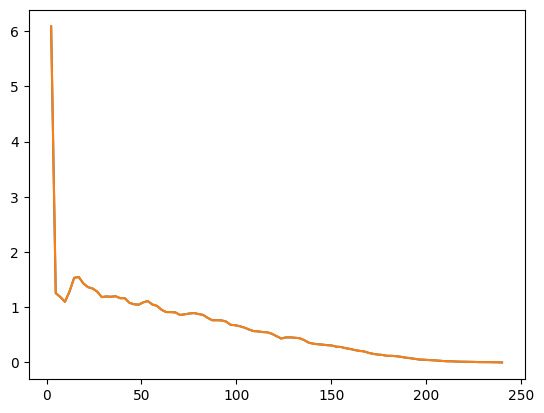

In [154]:
plt.plot(res1[1][1:], res1[0][1:])
plt.plot(res2[1][1:], res2[0][1:])
plt.show()

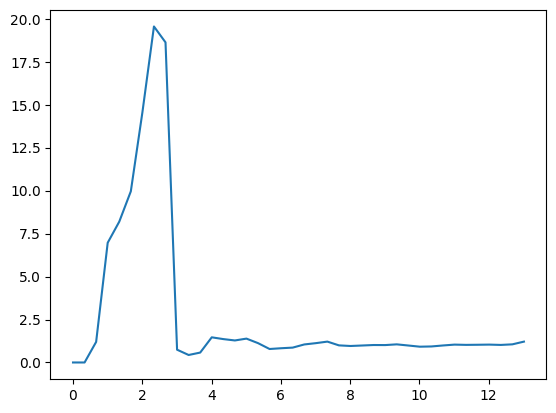

In [173]:
plt.plot(res2[1][:40], res2[0][:40])